<a href="https://colab.research.google.com/github/aluuduarte/DataScienceProjects/blob/main/Examen_Mod2_Duarte.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Ejercicio 1**: Random Walk:
En la misma deben estar 5 caminatas juntas y además dos subplots en la parte inferior
con la caminata que mas se alejó hacia los positivos y la que mas se alejó hacia los negativos.
Busquen la forma de eliminar los ejes x. Coloque una grilla de fondo como se ve en la figura.
AYUDA: Lean la documentación de pyplot.subplot

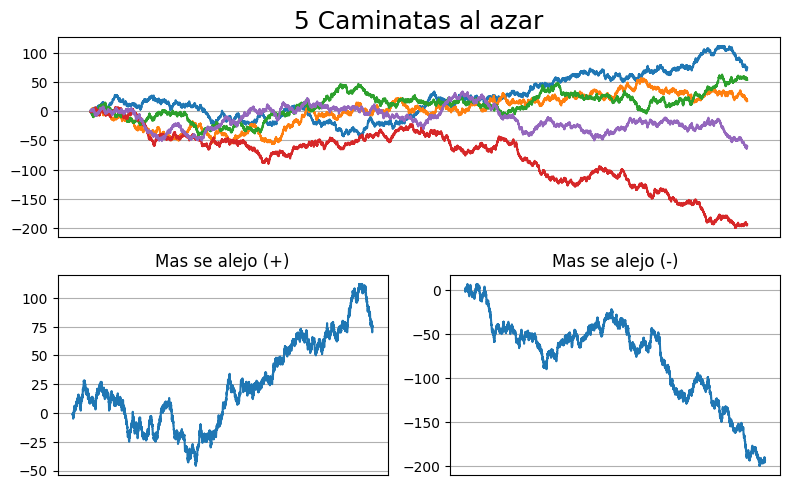

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def randomwalk(largo):
    """
    Genera una caminata al azar de longitud 'largo'.
    """
    pasos = np.random.randint(-1, 2, largo)
    return pasos.cumsum()

N = 10000
num_caminatas = 5
caminatas = []
max_positivos = -np.inf
max_negativos = np.inf
caminata_max_positivos = None
caminata_max_negativos = None

for i in range(num_caminatas):
    c = randomwalk(N)
    caminatas.append(c)
    c_max = np.max(c)
    c_min = np.min(c)
    if c_max > max_positivos:
        max_positivos = c_max
        caminata_max_positivos = c
    if c_min < max_negativos:
        max_negativos = c_min
        caminata_max_negativos = c

fig = plt.figure(figsize=(8, 5))
gs = fig.add_gridspec(2, 2)
ax0 = fig.add_subplot(gs[0, :])

for c in caminatas:
    ax0.plot(c)
ax0.set_title(f'{num_caminatas} Caminatas al azar', fontsize=18)
ax0.grid(axis='y')
ax0.tick_params(labelbottom=False)
ax0.set_xticks([])

ax1 = fig.add_subplot(gs[1, 0])
ax1.plot(caminata_max_positivos, 'C0')
ax1.set_title('Mas se alejo (+)', fontsize=12)
ax1.grid(axis='y')
ax1.tick_params(labelbottom=False)
ax1.set_xticks([])

ax2 = fig.add_subplot(gs[1, 1])
ax2.plot(caminata_max_negativos, 'C0')
ax2.set_title('Mas se alejo (-)', fontsize=12)
ax2.grid(axis='y')
ax2.tick_params(labelbottom=False)
ax2.set_xticks([])

plt.tight_layout()
plt.show()

## **Ejercicio 2**: Cultivos en Bs.As.
Escribí código que te permita leer todos los datos de la planilla, almacenando los valores en alguna estructura de datos de Python que te parezca la mas apropiada para responder a las preguntas que vienen a continuación. Esa estructura podria ser listas, arrays o series, explicá y fundamentá la elección de la estructura.
Si no encontrás ninguna que sea perfecta o que no se ajuste en forma ideal a lo que necesitás, discutilo y sugerí que cambios harias en los datos para poder operar más facilmente con la estructura de Python que elegiste.
1. ¿Cuántos tipos de cultivos diferentes hay registrados en la Provincia de Buenos Aires?
2. ¿Cuál es el principal municipio productor de Ajo en la Provincia? ¿cuál fue el año de mayor superficie sembrada y cual el año de mayor rendimiento?
3. ¿Cuál es el cultivo que mas produjo Bolivar en 2023? Para este, hacé un plot con la evolución año a año.
4. ¿Cuáles son los mejores años de producción en la Provincia para cada cultivo? ¿Coinciden para todos los cultivos? Hace un gráfico que muestre esto de forma entendible.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

cultivos_BsAs = pd.read_csv('/content/EXAMEN-estimaciones-agricolas-1969_2024.csv')
cultivos_BsAs.columns

Index(['cultivo', 'año', 'municipio_id', 'municipio_nombre',
       'superficie_sembrada', 'superficie_cosechada', 'produccion',
       'rendimiento'],
      dtype='object')

In [ ]:
# -- 1
#cultivos_BsAs.info()
cultivos_diferentes = cultivos_BsAs['cultivo'].nunique()
print(f"Cultivos diferentes en la Pcia. de Bs. As.: {cultivos_diferentes}")

Cultivos diferentes en la Pcia. de Bs. As.: 31


In [ ]:
# -- 2
df_ajo = cultivos_BsAs[cultivos_BsAs['cultivo'] == 'Ajo']

mayor_productor = df_ajo.groupby('municipio_nombre')['produccion'].sum().idxmax()

idx_sembrada = df_ajo['superficie_sembrada'].idxmax()
anio_sembrada = df_ajo.loc[idx_sembrada, 'año']

idx_rendimiento = df_ajo['rendimiento'].idxmax()
anio_rendimiento = df_ajo.loc[idx_rendimiento, 'año']

print(f"a) Principal municipio productor de Ajo: {mayor_productor}")
print(f"b) Año de mayor superficie sembrada de Ajo: {anio_sembrada}")
print(f"c) Año de mayor rendimiento de Ajo: {anio_rendimiento}")

a) Principal municipio productor de Ajo: Villarino
b) Año de mayor superficie sembrada de Ajo: 1978
c) Año de mayor rendimiento de Ajo: 1973



 El cultivo que más produjo Bolívar en 2023 fue: Maíz
Gráfico de Producción:


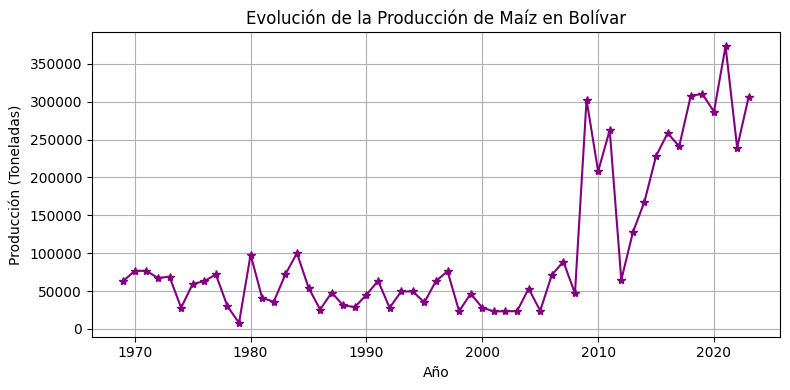

In [ ]:
# -- 3
df_bolivar_2023 = cultivos_BsAs[(cultivos_BsAs['municipio_nombre'] == 'Bolívar') & (cultivos_BsAs['año'] == 2023)]
idx_max = df_bolivar_2023['produccion'].idxmax()
cultivo_mas_producido = df_bolivar_2023.loc[idx_max, 'cultivo']
bolivar = df_bolivar_2023.loc[idx_max, 'municipio_nombre']

print(f"\n El cultivo que más produjo {bolivar} en 2023 fue: {cultivo_mas_producido}")
print("Gráfico de Producción:")

df_cultivo_bolivar = cultivos_BsAs[
    (cultivos_BsAs['municipio_nombre'] == bolivar) &
    (cultivos_BsAs['cultivo'] == cultivo_mas_producido)
]

produccion_anual = df_cultivo_bolivar.groupby('año')['produccion'].sum()
# ----- Gráfico plot. -----
plt.figure(figsize=(8, 4))
produccion_anual.plot(kind='line', marker='*', color='purple')
plt.title(f'Evolución de la Producción de {cultivo_mas_producido} en {bolivar}')
plt.xlabel('Año')
plt.ylabel('Producción (Toneladas)')
plt.grid(True)
plt.tight_layout()
plt.show()


 Mejores años de producción de cada cultivo:
              cultivo  Mejor Año  Max Producción (Ton)
852        Soja total       2015            21951941.0
773          Soja 1ra       2015            19090041.0
598              Maíz       2023            17859488.0
991       Trigo total       1996            10774607.0
244      Cebada total       2023             4831380.0
186  Cebada cervecera       2012             4749650.0
800          Soja 2da       2018             4319862.0
407           Girasol       1998             3771940.0
700        Papa total       1987             2119200.0
865             Sorgo       1973             2000000.0
135             Avena       2016              635196.0
273     Cebolla total       1997              583174.0
916     Trigo candeal       1976              582000.0
475              Lino       1977              400000.0
277           Centeno       1972              373000.0
87             Arveja       2021              212429.0
543              Ma

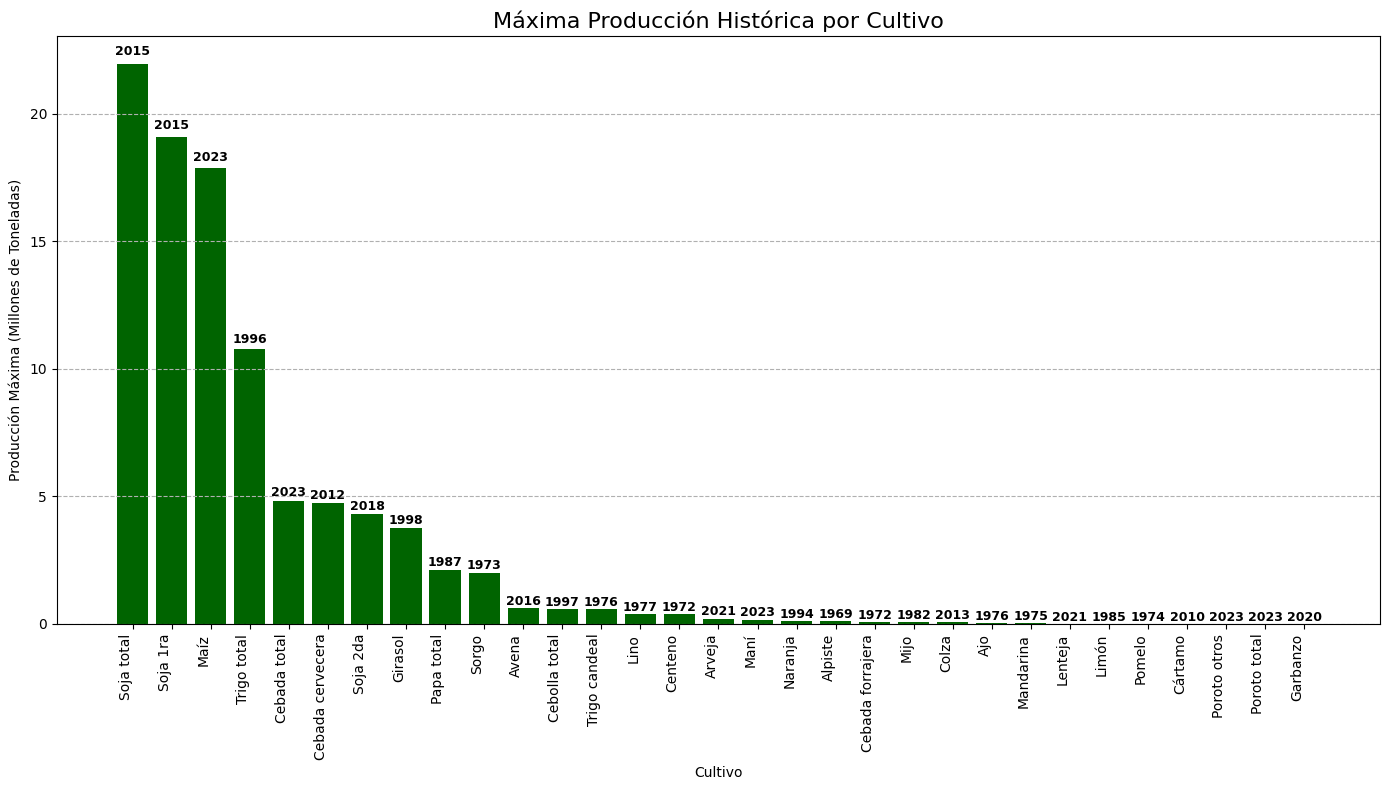

In [ ]:
# -- 4
df_prod_total_anual = cultivos_BsAs.groupby(['cultivo', 'año'])['produccion'].sum().reset_index()

idx_max_prod = df_prod_total_anual.groupby('cultivo')['produccion'].idxmax()
mejores_años = df_prod_total_anual.loc[idx_max_prod]
mejores_años = mejores_años.rename(columns={'año': 'Mejor Año', 'produccion': 'Max Producción (Ton)'}).sort_values(by='Max Producción (Ton)', ascending=False)

print("\n Mejores años de producción de cada cultivo:")
print(mejores_años[['cultivo', 'Mejor Año', 'Max Producción (Ton)']])

print("No, no coinciden para todos los cultivos")

df_plot = mejores_años.sort_values(by='Max Producción (Ton)', ascending=False)

plt.figure(figsize=(14, 8))
bars = plt.bar(df_plot['cultivo'], df_plot['Max Producción (Ton)'] / 1e6, color='darkgreen')
plt.xticks(rotation=90, ha='right')
plt.title('Máxima Producción Histórica por Cultivo', fontsize=16)
plt.xlabel('Cultivo')
plt.ylabel('Producción Máxima (Millones de Toneladas)')
plt.grid(axis='y', linestyle='--')

for bar in bars:
    yval = bar.get_height()
    año = df_plot.loc[df_plot['Max Producción (Ton)'] / 1e6 == yval, 'Mejor Año'].iloc[0]
    plt.text(bar.get_x() + bar.get_width()/2, yval + (yval * 0.01), str(año), ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

## **Ejercicio 3**: Numpy
El siguiente código debería arrojar como resultado 6, pero nos devuelve 7. Lee con atención las siguientes líneas y encontrá dónde hay un error.

In [ ]:
import numpy as np
# Creamos un array de 5x4
a = np.array([[0,1,1,0,1],
[1,0,0,0,1],
[1,1,1,1,0],
[0,1,0,1,0]])

# Extraemos el subarray de 2x3 de la esquina superior izquierda
#s1 = a[:1,:3] El error es que está tomando " 1, " en vez de tomar " 2, " Esto cambia la cantidad de filas que se extrae.
s1 = a[:2,:3] # Solucionado

# Extraemos el subarray de 2x3 de la esquina inferior derecha
s2 = a[2:,2:]
# Los sumamos
s = s1 + s2
# Suamos todos los elementos de s
print(s.sum())

6
